# SLP vs MLP — Regression using PyTorch

This project implements **Single Layer Perceptron (SLP)** and **Multi Layer Perceptron (MLP)** models using PyTorch for regression on a synthetic dataset.  
We compare the performance of the two models in terms of **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² Score**.
deep learning models


In [11]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


In [13]:
# Load dataset
data = pd.read_csv('synthetic_regression_dataset.csv')
X = data[['Feature']].values
y = data[['Target']].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [15]:
# Define SLP model
class SLP(nn.Module):
    def __init__(self, input_dim):
        super(SLP, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return self.linear(x)

# Initialize model, loss, optimizer
slp_model = SLP(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(slp_model.parameters(), lr=0.001)

# Training loop
epochs = 300
slp_losses = []

for epoch in range(epochs):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = slp_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    slp_losses.append(loss.item())


In [16]:
# Evaluate SLP
slp_model.eval()
with torch.no_grad():
    y_pred_slp = slp_model(X_test_tensor).numpy()

slp_mae = mean_absolute_error(y_test, y_pred_slp)
slp_mse = mean_squared_error(y_test, y_pred_slp)
slp_r2 = r2_score(y_test, y_pred_slp)

print(f"SLP - MAE: {slp_mae:.4f}, MSE: {slp_mse:.4f}, R²: {slp_r2:.4f}")


SLP - MAE: 15.2442, MSE: 359.9246, R²: 0.0620


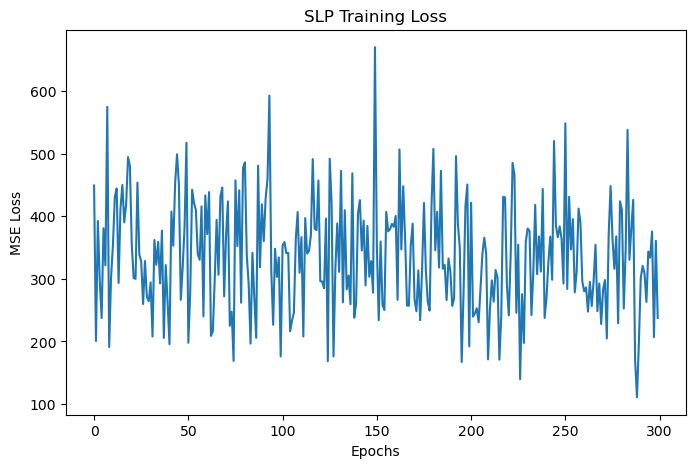

In [19]:
# Plot SLP Training Loss
plt.figure(figsize=(8,5))
plt.plot(slp_losses)
plt.title("SLP Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


In [21]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize model, loss, optimizer
mlp_model = MLP(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.001)

# Training loop
epochs = 500
mlp_losses = []

for epoch in range(epochs):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = mlp_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    mlp_losses.append(loss.item())


In [22]:
# Evaluate MLP
mlp_model.eval()
with torch.no_grad():
    y_pred_mlp = mlp_model(X_test_tensor).numpy()

mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print(f"MLP - MAE: {mlp_mae:.4f}, MSE: {mlp_mse:.4f}, R²: {mlp_r2:.4f}")


MLP - MAE: 8.1830, MSE: 108.8068, R²: 0.7164


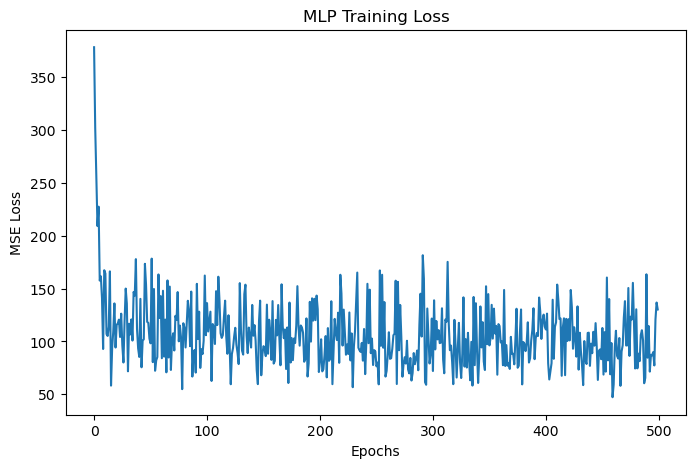

In [23]:
# Plot MLP Training Loss
plt.figure(figsize=(8,5))
plt.plot(mlp_losses)
plt.title("MLP Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


# Summary — SLP vs MLP Regression (PyTorch)

This project implements **Single Layer Perceptron (SLP)** and **Multi Layer Perceptron (MLP)** models for regression on a synthetic dataset using PyTorch. The models were trained and evaluated on **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² Score**.

**Results:**

| Model | MAE   | MSE    | R²     |
|-------|-------|--------|--------|
| SLP   | 15.24 | 359.92 | 0.062  |
| MLP   | 8.18  | 108.81 | 0.716  |

**Insights:**
- SLP performs poorly on non-linear data due to its linear nature.
- MLP captures non-linear patterns effectively, achieving significantly lower error and higher R².
- Dropout layers in MLP improve generalization and prevent overfitting.
- Choosing the right architecture is crucial: complex datasets require deeper models.

**Conclusion:**  
For regression tasks with non-linear relationships, **MLP is the preferred model**, while SLP may only suffice for simple linear patterns.
